In [1]:
#
# For daal4py using please create conda environment with command like
#
# conda create -n d4p -c intel python=3.7 scikit-learn matplotlib pandas seaborn threadpoolctl
#
# and than run "jupiter notebook" with that environment from terminal
#

import numpy as np              
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn
import datetime

def is_daal4py_accessible():
    import importlib
    daal4py = importlib.util.find_spec('daal4py')
    
    # Check daal4py module in environment
    is_module_exists = daal4py is not None
    
    # Check that path to dynload libraries like 'libfabric' and 'libdaal' is set in environment (by conda)
    import os
    is_path_correct = 'libfabric' in ':'.join(os.environ.values())
    
    if is_module_exists and is_path_correct:
        return True
    return False

if is_daal4py_accessible():
    import daal4py.sklearn
    daal4py.sklearn.patch_sklearn()

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


# Should this Loan be Approved or Denied

TODO dataset description

## 1. Data loading

In [2]:
dataset_name = "SBAnational.csv"
data = pd.read_csv(dataset_name)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data shape:

In [38]:
data.shape

(873467, 26)

Data columns:

In [4]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Head of data:

In [5]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Tail of data:

In [6]:
data.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


Features:

- `LoanNr_ChkDgt` - ordinal, Identifier Primary key.
- `Name` - categorical, Borrower name. Some names repeating.
- `City` - categorical, Borrower city.
- `State` - categorical, Borrower state.
- `Zip` - ordinal, Borrower zip code. Postal code, characteristic of pair "State x City\[ x District\]".
- `Bank` - categorical, Bank name.
- `BankState` - categorical, Bank state.
- `NAICS` - ordinal, North American industry classification system code. Format is a number or "0" (about 20% of values).
- `ApprovalDate` - ordinal, Date SBA commitment issued.
- `ApprovalFY` - ordinal, Fiscal year of commitment. Isn't matched with calendar year: 1 oct - 30 sep.
- `Term` - quantitative, Loan term in months.
- `NoEmp` - quantitative, Number of business employees.
- `NewExist` - categorical, 1 = Existing business, 2 = New business. "0" value in 1023 rows it isn't documented.
- `CreateJob` - quantitative, Number of jobs created.
- `RetainedJob` - quantitative, Number of jobs retained.
- `FranchiseCode` - Franchise code, (00000 or 00001) = No franchise.
- `UrbanRural` - categorical, 1 = Urban, 2 = rural, 0 = undefined.
- `RevLineCr` - categorical, Revolving line of credit: Y = Yes, N = No. Has wrong values like "0".
- `LowDoc` - categorical, LowDoc Loan Program: Y = Yes, N = No. This program is "low documented" program for credits with small gross amount.
- `ChgOffDate` - ordinal, The date when a loan is declared to be in default. # Empty value if "paid in full", otherwise date.
- `DisbursementDate` - ordinal, Disbursement date.
- `DisbursementGross` - quantitative, Amount disbursed.
- `BalanceGross` - quantitative, Gross amount outstanding. Looks like wrong values column, 99% values are "0".
- `MIS_Status` - target, categorical, Loan status "Charged off"= CHGOFF, "Paid in full"=PIF.
- `ChgOffPrinGr` - quantitative, Charged-off amount. "0" if "paid off", otherwise amount of gross amount outstanding.
- `GrAppv` - quantitative, Gross amount of loan approved by bank. Equal to DisbursementGross in about 80% cases.
- `SBA_Appv` - quantitative, SBA’s guaranteed amount of approved loan


## 2. Analyse raw features

In [7]:
name = 'NAICS'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
315240         1
313310         1
311311         1
111130         1
212231         1
Name: NAICS, Length: 1312, dtype: int64
Percent of "0" value is: 22%


Feature 'NewExist' has "0" values, that are not documented.

In [8]:
name = 'NewExist'
print(data[name].value_counts())

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64


Franchise code is frequently "0" or "1".

In [9]:
name = 'FranchiseCode'
print(data[name].value_counts())

1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
26549         1
38608         1
75677         1
77030         1
25366         1
Name: FranchiseCode, Length: 2768, dtype: int64


A lot of "Undefined" (zero-coded) values in "UrbanRural"

In [10]:
name = 'UrbanRural'
value_counts = data[name].value_counts()
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

Percent of "0" value is: 35%


'RevLineCr' has a lot of wrong values

In [11]:
name = 'RevLineCr'
value_counts = data[name].value_counts()
print(value_counts)

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
,         1
3         1
Q         1
5         1
4         1
.         1
-         1
7         1
A         1
Name: RevLineCr, dtype: int64


'LowDoc' has a lot of wrong values

In [12]:
name = 'LowDoc'
value_counts = data[name].value_counts()
print(value_counts)

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64


'BalanceGross' has a lot of zero values, it doesn't impact decision about creditworthiness of an borrower.

In [13]:
name = 'BalanceGross'
value_counts = data[name].value_counts()
print(value_counts)

$0.00           899150
$395,476.00          1
$37,100.00           1
$115,820.00          1
$41,509.00           1
$1,760.00            1
$827,875.00          1
$43,127.00           1
$12,750.00           1
$84,617.00           1
$25,000.00           1
$96,908.00           1
$996,262.00          1
$600.00              1
$9,111.00            1
Name: BalanceGross, dtype: int64


'MIS_Status' is a target of current research. Here is an analysis of class balance.

In [14]:
name = 'MIS_Status'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "P I F" value is:', str(int(value_counts.loc['P I F'] / data.shape[0] * 100))+'%')
print('Percent of "CHGOFF" value is:', str(int(value_counts.loc['CHGOFF'] / data.shape[0] * 100))+'%')

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64
Percent of "P I F" value is: 82%
Percent of "CHGOFF" value is: 17%


## 3. Preprocess features

In [15]:
def convert_dollars(data, column_name):
    if data[column_name].dtype != np.uint64:
        gross_data = data[column_name].astype('str')
        repl = lambda match: match.group(1)
        gross_data = gross_data.str.replace(r'\$([\d,]*)\.[\d]*', repl, regex=True)
        gross_data = gross_data.str.replace(r',', '')
        data[column_name] = gross_data.astype('float').astype(np.uint64)

data['LoanNr_ChkDgt'] = data['LoanNr_ChkDgt'].astype(np.uint64)
data['Name'] = data['Name'].astype('category')
data['City'] = data['City'].astype('category')
data['State'] = data['State'].astype('category')
data['Zip'] = data['Zip'].astype(np.uint64)
data['Bank'] = data['Bank'].astype('category')
data['BankState'] = data['BankState'].astype('category')
data['NAICS'] = data['NAICS'].astype(np.uint64)
data['ApprovalDate'] = data['ApprovalDate'].astype('datetime64')

if data['ApprovalFY'].dtype != np.uint64:
    data['ApprovalFY'] = pd.to_numeric(data['ApprovalFY'].replace({'1976A': 1976})).astype(np.uint64)
    
data['Term'] = data['Term'].astype(np.uint64)
data['NoEmp'] = data['NoEmp'].astype(np.uint64)

if data['NewExist'].dtype != np.uint64:
    data = data.drop(data.loc[data['NewExist'].isna()].index)
    data['NewExist'] = data['NewExist'].astype(np.uint64)
    data = data.drop(data.loc[data['NewExist'] == 0].index)

data['CreateJob'] = data['CreateJob'].astype(np.uint64)
data['RetainedJob'] = data['RetainedJob'].astype(np.uint64)
data['FranchiseCode'] = data['FranchiseCode'].astype(np.uint64)
data['UrbanRural'] = data['UrbanRural'].astype('category')

# Remore values that are not in {'N', '0', 'Y', 'T'} in column 'RevLineCr'
if data['RevLineCr'].dtype != np.bool:
    data['RevLineCr'] = data['RevLineCr'].astype('str')
    data = data.drop(data.loc[~data['RevLineCr'].isin({'N', '0', 'Y', 'T'})].index)
    data['RevLineCr'] = pd.to_numeric(data['RevLineCr'].replace({'N': False, '0' : False, 'Y' : True, 'T' : True})).astype(np.bool)

# Remore values that are not in {'N', 'Y'} in column 'LowDoc'
if data['LowDoc'].dtype != np.bool:
    data['LowDoc'] = data['LowDoc'].astype('str')
    data = data.drop(data.loc[~data['LowDoc'].isin({'N', 'Y'})].index)
    data['LowDoc'] = pd.to_numeric(data['LowDoc'].replace({'N': False, 'Y' : True})).astype(np.bool)

data['ChgOffDate'] = data['ChgOffDate'].astype('datetime64')
data['DisbursementDate'] = data['DisbursementDate'].astype('datetime64')

# Format amounts like "$100,000.00" to numbers like "100000" in column "DisbursementGross"
convert_dollars(data, 'DisbursementGross')

if "BalanceGross" in data.columns:
    data = data.drop(columns=["BalanceGross"])

if data['MIS_Status'].dtype != np.bool:
    data['MIS_Status'] = pd.to_numeric(data['MIS_Status'].replace({'P I F': True, 'CHGOFF' : False})).astype(np.bool)

# Format amounts like "$100,000.00" to numbers like "100000" in column "ChgOffPrinGr"
convert_dollars(data, 'ChgOffPrinGr')

# Remove rows with 'MIS_Status' == 'Paid In Full' and 'ChgOffPrinGr' != 0 (inappropriate situation)
index_to_drop = data.loc[(data['ChgOffPrinGr'] != 0) & (data['MIS_Status'] == True)].index
if index_to_drop.shape[0] != 0:
    data = data.drop(index_to_drop)

# Format amounts like "$100,000.00" to numbers like "100000" in column "GrAppv"  
convert_dollars(data, 'GrAppv')
    
# Format amounts like "$100,000.00" to numbers like "100000" in column "GrAppv"
convert_dollars(data, 'SBA_Appv')
    
print("Success")

Success


## 4. Analyse preprocessed features

In [16]:
data.shape

(882574, 26)

In [17]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,0,False,True,NaT,1999-02-28,60000,True,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,0,False,True,NaT,1997-05-31,40000,True,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,0,False,False,NaT,1997-12-31,287000,True,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,0,False,True,NaT,1997-06-30,35000,True,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,0,False,False,NaT,1997-05-14,229000,True,0,229000,229000


In [18]:
data.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,0,False,False,NaT,1997-09-30,70000,True,0,70000,56000
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,0,True,False,NaT,1997-10-31,85000,True,0,85000,42500
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,0,False,False,NaT,1997-09-30,300000,True,0,300000,225000
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,0,False,True,2000-03-08,1997-03-31,75000,False,46383,75000,60000
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,1997-02-27,1997,...,0,False,False,NaT,1997-05-31,30000,True,0,30000,24000


'NAICS' is ok.

In [19]:
name = 'NAICS'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

0         198050
722110     27530
722211     19199
811111     14327
621210     13825
           ...  
311351         1
333413         1
336414         1
313310         1
111336         1
Name: NAICS, Length: 1311, dtype: int64
Percent of "0" value is: 22%


Approval date is matched with Approval fiscal year in about 70% cases.

In [20]:
print(data['ApprovalDate'])
years_data = data['ApprovalDate'].apply(lambda x: x.year).astype(np.int64)
print((years_data - data['ApprovalFY']).value_counts())

0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: ApprovalDate, Length: 882574, dtype: datetime64[ns]
 0.0      678064
-1.0      204507
 99.0          2
 100.0         1
dtype: int64


'NewExist' is ok, undefined values were deleted.

In [21]:
name = 'NewExist'
print(data[name].value_counts())

1    634773
2    247801
Name: NewExist, dtype: int64


'FranchiseCode' is ok

In [22]:
name = 'FranchiseCode'
print(data[name].value_counts())

1        628612
0        202972
78760      3327
68020      1901
50564      1020
          ...  
3708          1
57110         1
25201         1
60000         1
32127         1
Name: FranchiseCode, Length: 2746, dtype: int64


Still the same situation with 'UrbanRural'

In [23]:
name = 'UrbanRural'
value_counts = data[name].value_counts()
value_counts = value_counts.rename(index={0 : '0', 1 : '1', 2 : '2'})
print(value_counts)
print('Percent of "0" (undefined) value is:', str(int(value_counts.loc['0'] / data.shape[0] * 100))+'%')

1    463145
0    315781
2    103648
Name: UrbanRural, dtype: int64
Percent of "0" (undefined) value is: 35%


'RevLineCr' is ok, no undefined values

In [24]:
name = 'RevLineCr'
value_counts = data[name].value_counts()
print(value_counts)

False    668620
True     213954
Name: RevLineCr, dtype: int64


'LowDoc' is ok, no undefined values

In [25]:
name = 'LowDoc'
value_counts = data[name].value_counts()
print(value_counts)

False    774780
True     107794
Name: LowDoc, dtype: int64


'BalanceGross' has been removed

In [26]:
name = 'BalanceGross'
print('BalanceGross in dataframe:', name in data.columns)

BalanceGross in dataframe: False


Target classes percentage is saved

In [27]:
name = 'MIS_Status'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "P I F" value is:', str(int(value_counts.loc[True] / data.shape[0] * 100))+'%')
print('Percent of "CHGOFF" value is:', str(int(value_counts.loc[False] / data.shape[0] * 100))+'%')

True     726774
False    155800
Name: MIS_Status, dtype: int64
Percent of "P I F" value is: 82%
Percent of "CHGOFF" value is: 17%


Reset index of data for upcoming analysis

In [28]:
data = data.reset_index(drop=True)

## Analyse data

Analysis of quantitative features. Columns 'LoanNr_ChkDgt', 'Zip', 'NAICS' are conditionally quantitative, but are presented in analyses because can contain some data insights.

In [29]:
data.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.825740e+05,882574.000000,882574.000000,882574.000000,882574.000000,882574.000000,882574.000000,882574.000000,882574.000000,882574.000000,8.825740e+05,8.825740e+05,8.825740e+05,8.825740e+05
mean,4.761130e+09,53802.818508,398814.187516,2001.129597,111.002245,11.423932,1.280771,8.484648,10.878676,2762.963186,2.019027e+05,1.350983e+04,1.932864e+05,1.498596e+05
std,2.536857e+09,31196.252766,263349.945385,5.894900,78.822511,73.775823,0.449376,237.772877,238.233044,12777.756678,2.877984e+05,6.541569e+04,2.833371e+05,2.281723e+05
min,1.000014e+09,0.000000,0.000000,1969.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000e+02,1.000000e+02
25%,2.578018e+09,27587.000000,235210.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.287000e+04,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.351575e+09,55409.000000,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000e+00,9.000000e+04,6.210000e+04
75%,6.854079e+09,83706.000000,561730.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,2.393640e+05,0.000000e+00,2.259112e+05,1.750000e+05
max,9.996003e+09,99999.000000,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,1.144632e+07,3.512596e+06,5.000000e+06,4.500000e+06


Analysis of categorical features.

In [30]:
data.describe(include=['category'])

,Name,City,State,Bank,BankState,UrbanRural
count,882560,882544,882562,881086,881079,882574
unique,765850,32185,51,5790,55,3
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,1
freq,1253,11405,128559,85399,114826,463145


Graphic setting up.

In [31]:
dims = (11.7, 8.27)

Terms distribution has several local highs.

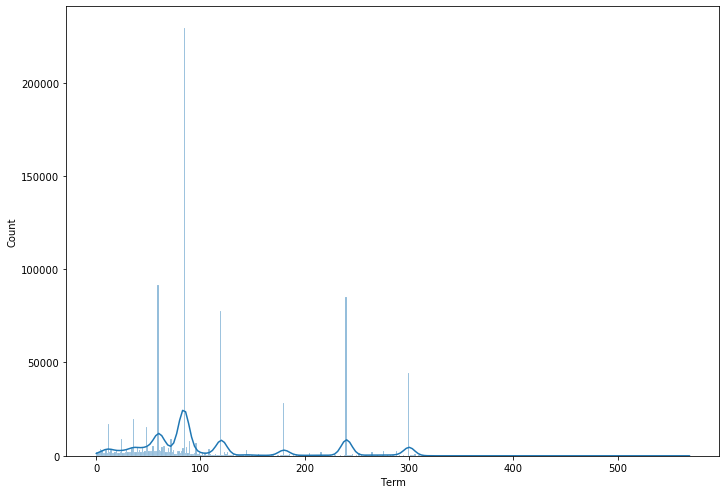

In [32]:
fig, ax = plt.subplots(figsize=dims)
sns.set_style('darkgrid')
sns.histplot(data['Term'], kde=True)

Most popular 'Term' values

In [33]:
data['Term'].value_counts()[0:5]

84     227718
60      88605
240     84639
120     76414
300     43988
Name: Term, dtype: int64

In [34]:
def get_indices(pif_parf, data, size):
    pif_index = data.loc[data['MIS_Status'] == True].index
    print("PIF index size:", pif_index.shape[0], ", PIF required size:", int(size*pif_parf))
    pif_subset = np.random.choice(pif_index, size=int(size*pif_parf), replace=False)
    
    chof_part = 1 - pif_parf
    chof_index = data.loc[data['MIS_Status'] == False].index
    print("CHOF index size:", chof_index.shape[0], ", CHOF required size:", int(size*chof_part))
    chof_subset = np.random.choice(chof_index, size=int(size*chof_part), replace=False)
    return np.concatenate([pif_subset, chof_subset])


Insights, got from pairplot:
<ul>
<li>Companies with large number of employes more often ask about long term borrow. Companies with small number of employes more often ask about short term borrow (NoEmp X DisbursementGross picture).</li>
<li>More term - more opportunities for paiding in full (Term X DisbursementGross picture).</li>
<li>SBA approvement correlated with disbursement gross, obviously (SBA_Appv x DisbursementGross picture).</li>
</ul>

PIF index size: 726774 , PIF required size: 210000
CHOF index size: 155800 , CHOF required size: 90000


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


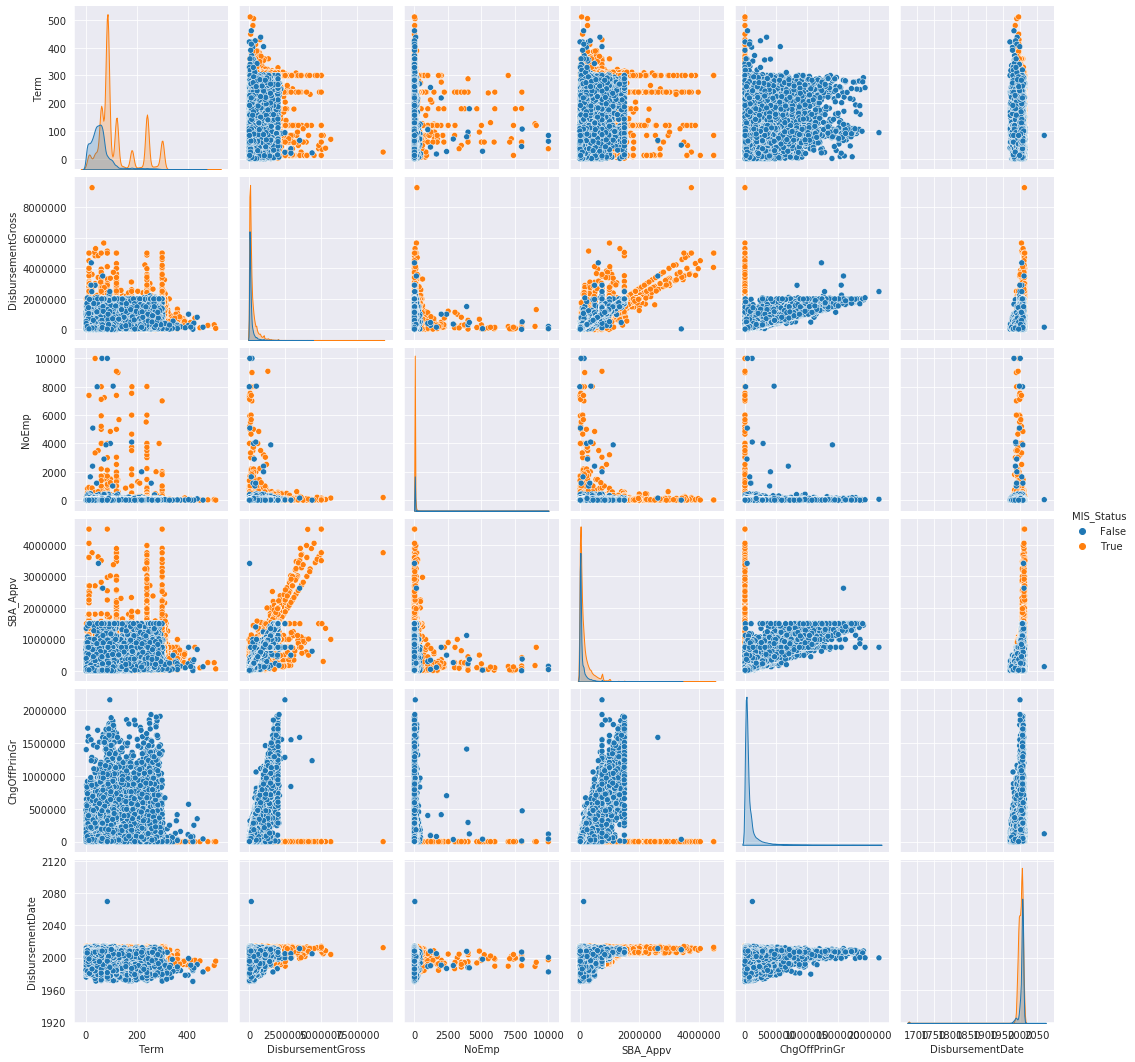

In [35]:
random_subset = get_indices(0.7, data, 300000)
sns.pairplot(data.iloc[random_subset], hue="MIS_Status", vars=['Term', 'DisbursementGross', 'NoEmp', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'])

Drop outliers which are detected on "pairplot".

In [36]:
data = data.drop(data.loc[data['ChgOffPrinGr'] >= 500_000].index)
data = data.drop(data.loc[data['DisbursementGross'] >= 6_000_000].index)
data = data.drop(data.loc[data['NoEmp'] >= 120].index) #ok
data = data.drop(data.loc[data['Term'] >= 450].index) #ok
date = datetime.date(2040, 1, 1)
data = data.drop(data.loc[data['DisbursementDate'] >= date].index)
data = data.reset_index(drop=True)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


PIF index size: 721326 , PIF required size: 210000
CHOF index size: 152141 , CHOF required size: 90000


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


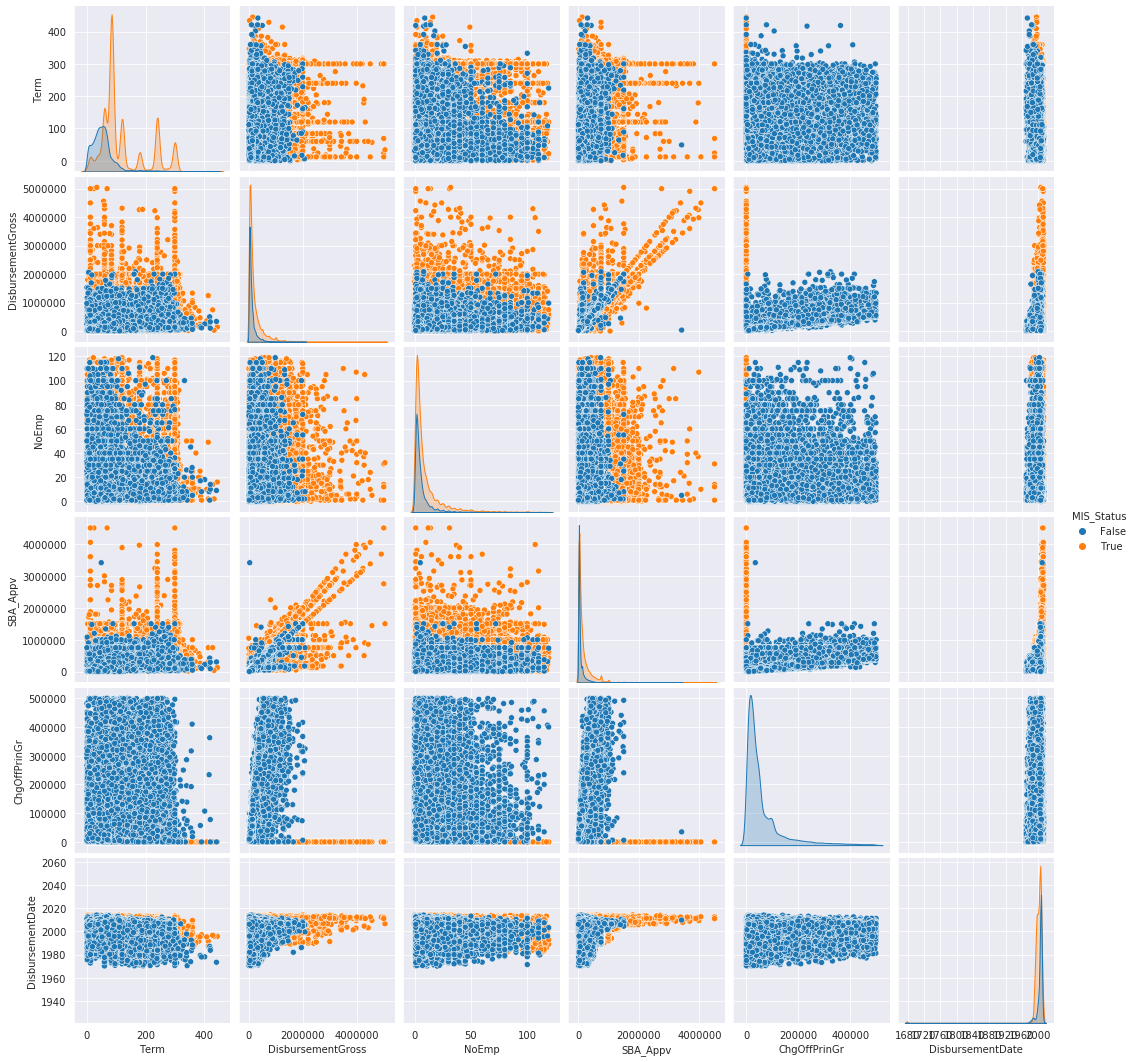

In [37]:
random_subset = get_indices(0.7, data, 300000)
sns.pairplot(data.iloc[random_subset], hue="MIS_Status", vars=['Term', 'DisbursementGross', 'NoEmp', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'])

Apply logarithm to amount values

PIF index size: 723577 , PIF required size: 700
CHOF index size: 152379 , CHOF required size: 300


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


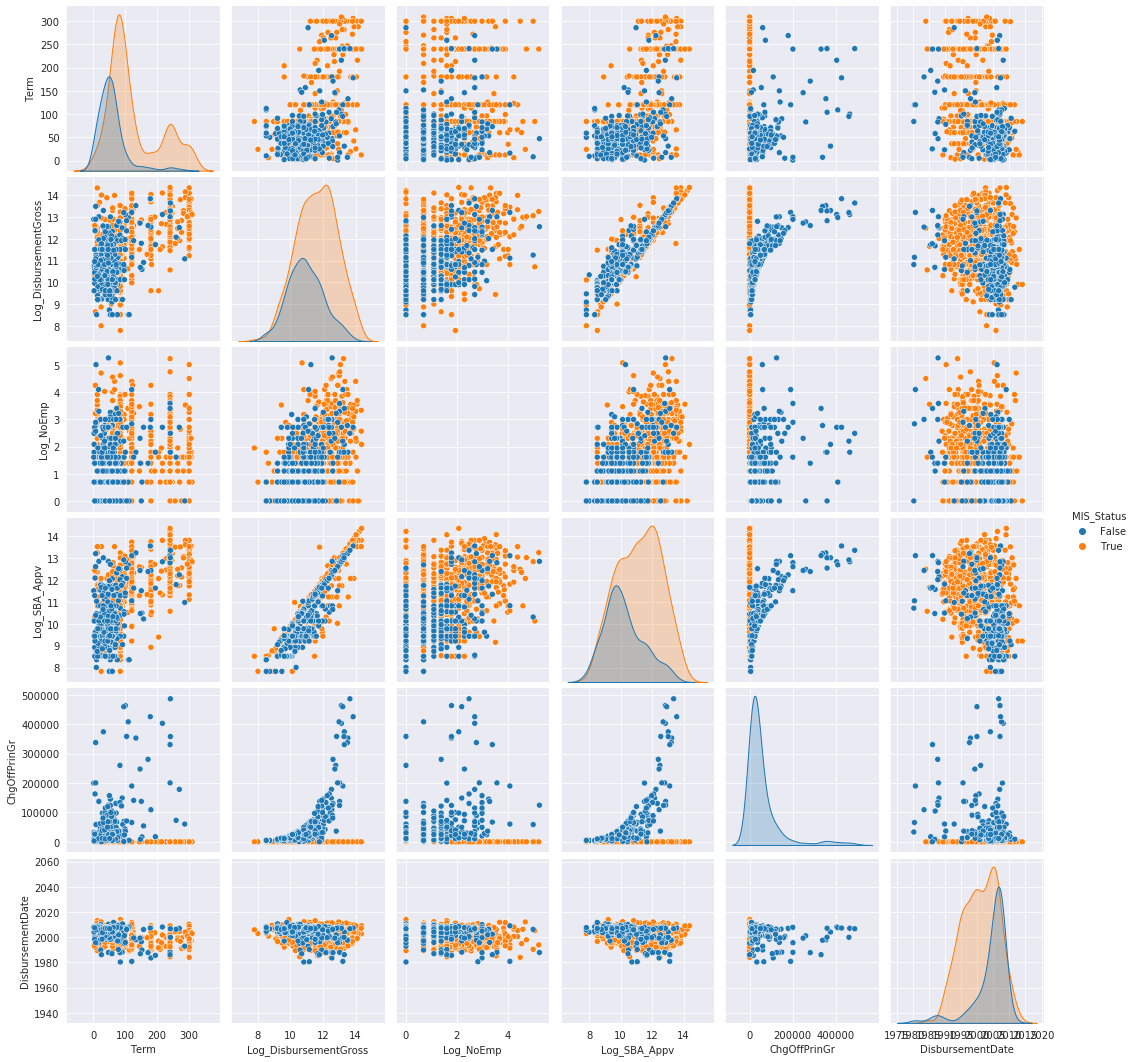

In [43]:
random_subset = get_indices(0.7, data, 1000)
data_log = data.copy()
data_log['Log_Term'] = np.log(data_log['Term'])
data_log['Log_DisbursementGross'] = np.log(data_log['DisbursementGross'])
data_log['Log_SBA_Appv'] = np.log(data_log['SBA_Appv'])
data_log['Log_NoEmp'] = np.log(data_log['NoEmp'])
data_log.drop(['DisbursementGross', 'SBA_Appv', 'NoEmp', 'Term'], axis=1)
sns.pairplot(data_log.iloc[random_subset], hue="MIS_Status" ,vars=['Log_Term', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'])

## 2. Боремся с выбросами (outliers)

Понятно, что цена квартиры в первую очередь зависит от ее площади.
Построим поэтому диаграмму рассеивания для двух признаков: `Price` и `Area`.


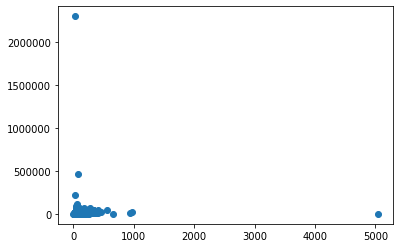

In [31]:
plt.scatter(data_raw['Area'], data_raw['Price'])
pass

Можно вот так:

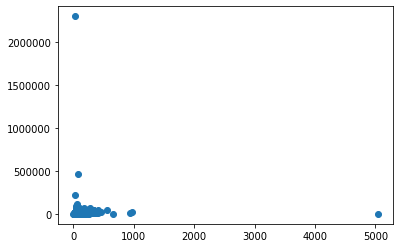

In [32]:
plt.scatter(x='Area', y='Price', data=data_raw)
pass

Мы видим, что основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют квартирам с чрезмерно большими значениями цены или площади. Например, более $2$ млрд. руб. или $5$ тыс. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков `Price` и `Area`:

In [33]:
data_raw['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      800.0
0.010     1000.0
0.050     1500.0
0.100     1700.0
0.500     2850.0
0.900     5500.0
0.950     7000.0
0.990    12000.0
0.995    14900.0
Name: Price, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака `'Price'` находится в диапазоне от $800$ до $14900$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [34]:
data_raw['Area'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     18.0
0.010     19.0
0.050     29.0
0.100     31.0
0.500     46.0
0.900     80.0
0.950     94.0
0.990    150.0
0.995    162.0
Name: Area, dtype: float64

$99.9\%$ всех значений `'Area'` находится в диапазоне от $18$ до $162$ тыс. руб. 

Удалим все строки таблицы, в которых `'Price'` или `'Area'` выходят за пределы квантилей $0.005$, $0.995$.

In [35]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) | 
    (data_raw['Area']  < data_raw['Area' ].quantile(0.005)) | (data_raw['Area']  > data_raw['Area' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(71265, 10)

In [36]:
rows_to_drop

Int64Index([    6,    34,    41,   215,   222,   274,   338,   366,   418,
              471,
            ...
            71441, 71551, 71759, 71932, 71993, 72018, 72109, 72128, 72269,
            72311],
           dtype='int64', length=1114)

## 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных.
Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [37]:
data.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,71265.000000,71265.000000,71265.000000,71265.000000,71248.000000,71248.000000,71248.000000,71248.000000
mean,3310.907396,264.311120,56.295105,43.935371,9.406425,1.945977,5.188525,52.503329
std,1748.493102,87.897571,0.044836,0.081757,5.131401,0.910165,3.876806,21.402428
min,800.000000,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,18.000000
25%,2200.000000,190.000000,56.265022,43.868571,5.000000,1.000000,2.000000,37.000000
50%,2850.000000,295.000000,56.300147,43.931804,9.000000,2.000000,4.000000,46.000000
75%,3850.000000,344.000000,56.325320,44.005985,12.000000,3.000000,7.000000,63.000000
max,14900.000000,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,162.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получил информацию о категориальных:

In [38]:
data.describe(include=['category'])

,Type,Building
count,71248,71248
unique,2,5
top,Resale,Brick
freq,63136,52408


Давайте снова построим диаграмму рассеивания для признаков `'Area'`, `'Price'`:

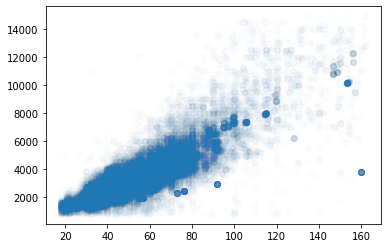

In [39]:
plt.scatter(data['Area'], data['Price'], alpha=0.01)
pass

Точки выстроились более-менее вдоль прямой идущей из нижнего левого угла в правый верхний: т.е. в некотором приближении зависимость стоимости квартиры от ее площади линейная.

Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика (особенно, если не использовать параметр `alpha`). Поэтому изобразим только $1000$ случайных точек:

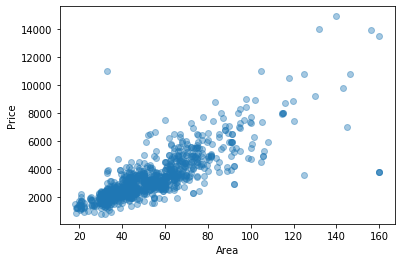

In [40]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Area'], data.iloc[random_subset]['Price'], alpha=0.4)
plt.xlabel('Area')
plt.ylabel('Price')
pass

Построим диаграмму рассеивания для признаков `'Price'` и `'Date'`:

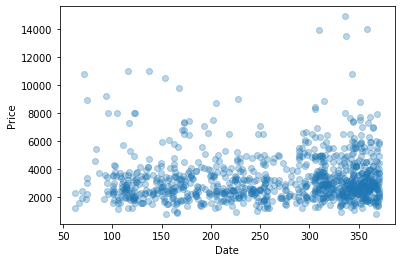

In [41]:
plt.scatter(data.iloc[random_subset]['Date'], data.iloc[random_subset]['Price'], alpha = .3)
plt.xlabel('Date')
plt.ylabel('Price')
pass

Из рисунка понятно, что, по-видимому, никакой зависимости между ценой и датой нет.
Однако видно, что точки сгущаются с ростом значения `Date`, т.е. продажи увеличиваются.

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует типу строения `'Building'`, а размер - количеству комнат `'Rooms'`:

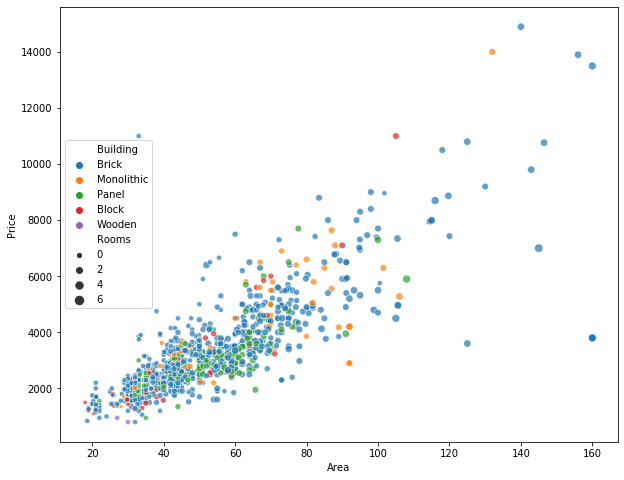

In [42]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Area', y='Price', size='Rooms', hue='Building', data=data.iloc[random_subset], alpha=0.7)
pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью квартиры. Также можно увидеть, что квартиры в панельных домах, как правило, имеют умеренные размеры и умеренные цены. Квартиры в монолитных домах, как правило, больше и дороже. Кирпичные дома бываю в разной ценовой категории, но самые большие и дорогие квартиры - в основном в кирпичных домах.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

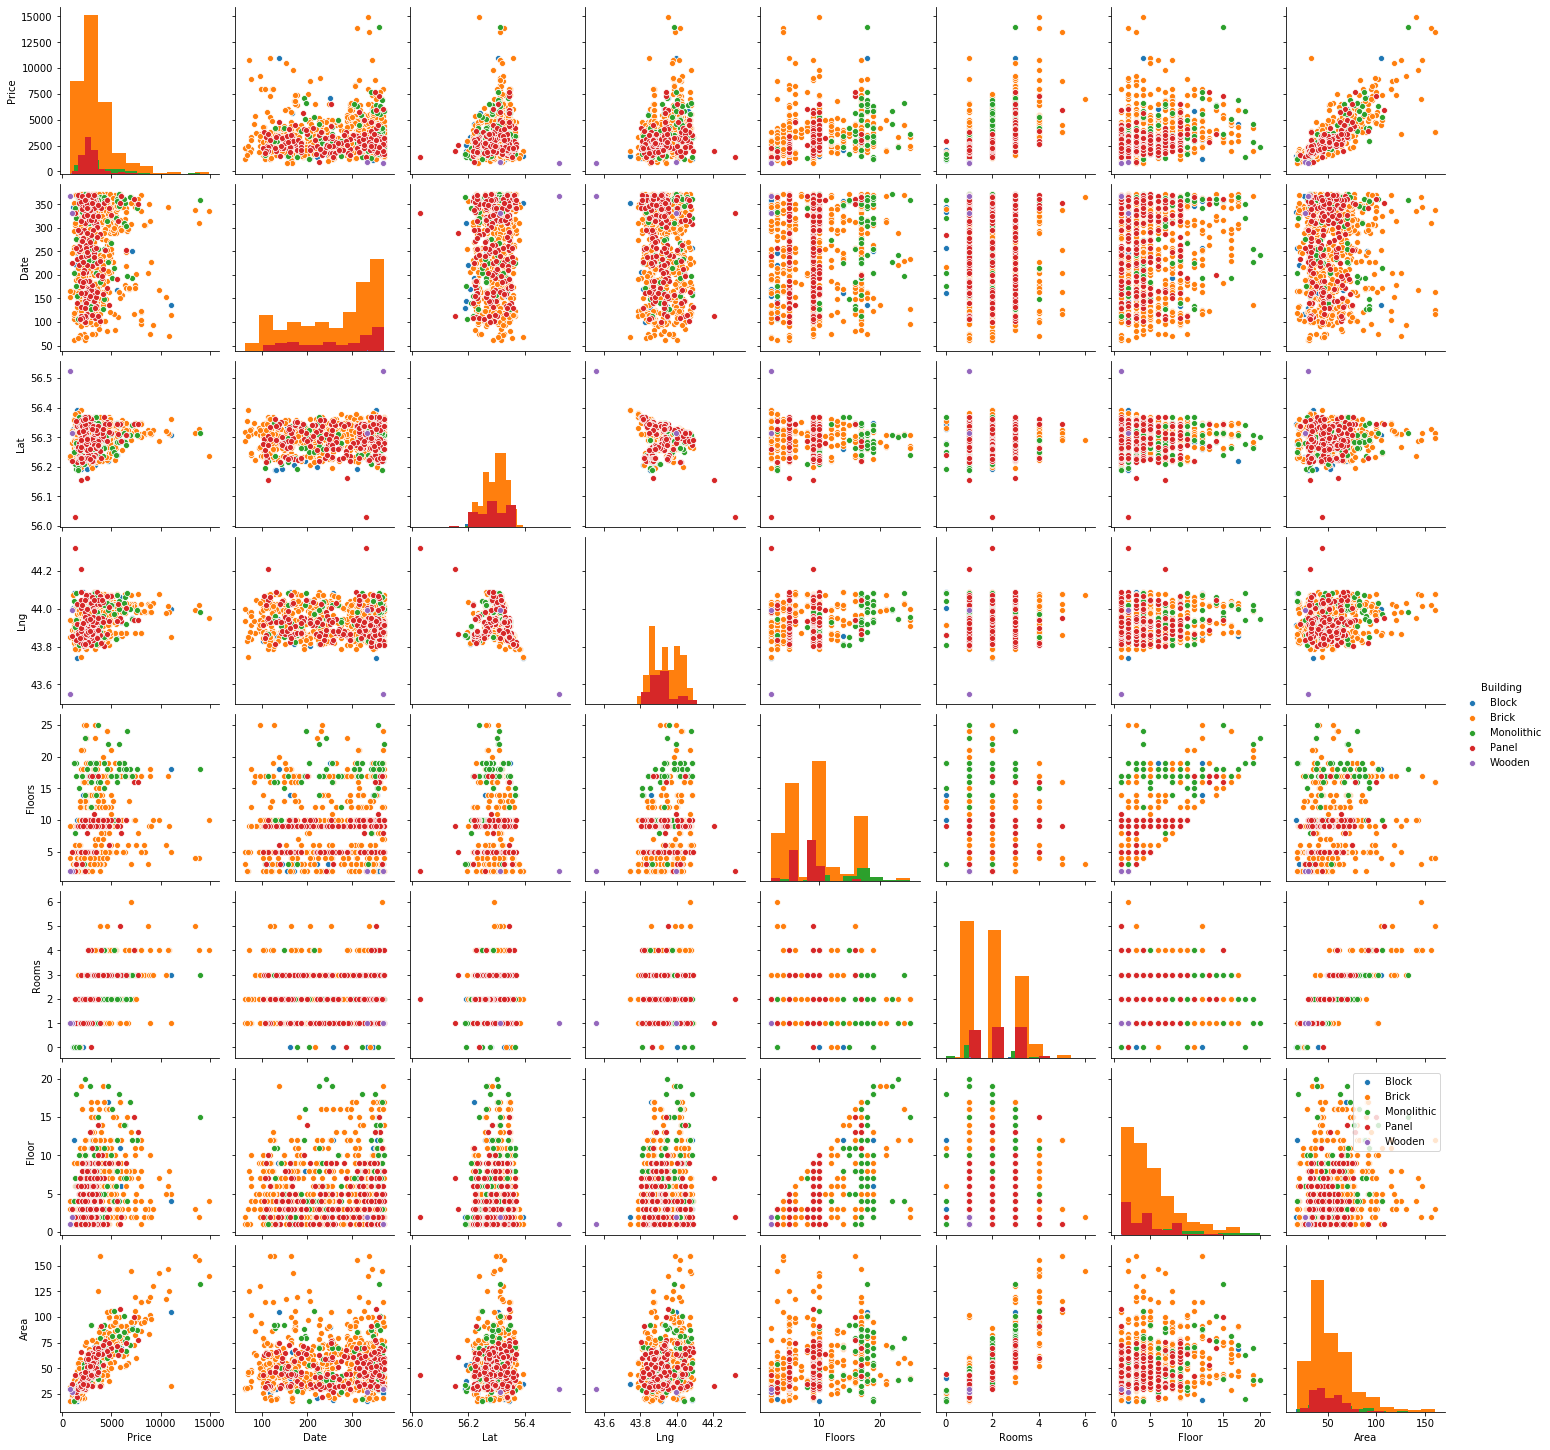

In [43]:
sns.pairplot(data.iloc[random_subset], hue='Building', diag_kind='hist')
plt.legend()
pass

На диаграммах, в частности, наблюдается попарная корреляция между `Price`, `Area` и `Rooms`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции `plt.hist`, но мы воспользуемся `distplot` из библиотеки `seaborn`.

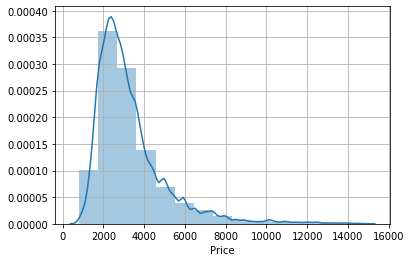

In [44]:
sns.distplot(data['Price'], bins=15)
plt.grid()
pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

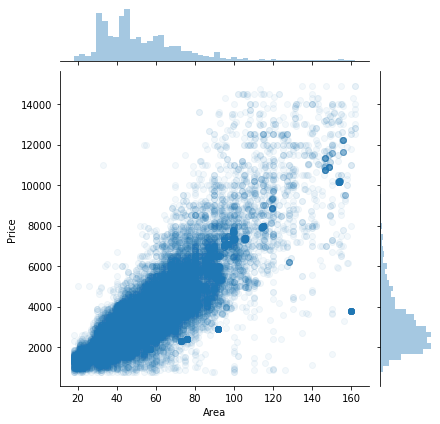

In [45]:
sns.jointplot(x='Area', y='Price', alpha=.05, data=data)
pass

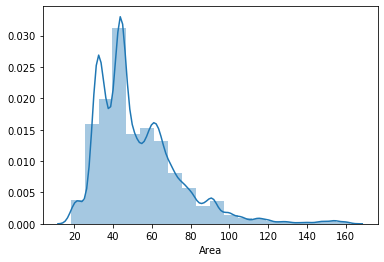

In [46]:
sns.distplot(data['Area'], bins = 20)
pass

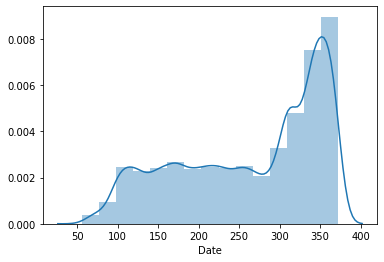

In [47]:
sns.distplot(data['Date'], bins = 15)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

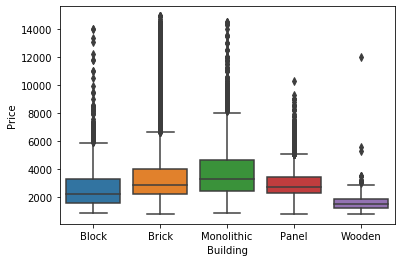

In [48]:
sns.boxplot(x="Building", y="Price", data=data)
pass

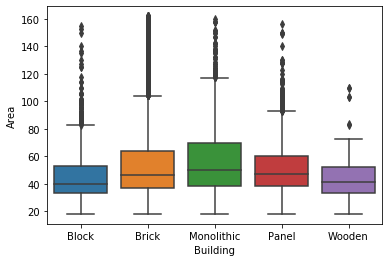

In [49]:
sns.boxplot(x="Building", y="Area", data=data)
pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

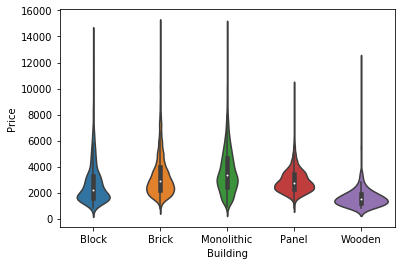

In [50]:
sns.violinplot(x="Building", y="Price", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [51]:
corr_mat = data.corr()
corr_mat

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,1.000000,0.033228,0.174728,0.305763,0.359210,0.554399,0.252512,0.852936
Date,0.033228,1.000000,0.010290,-0.002029,0.045034,-0.002045,0.032884,0.013564
Lat,0.174728,0.010290,1.000000,0.017505,0.079252,0.101350,0.048735,0.154772
Lng,0.305763,-0.002029,0.017505,1.000000,0.221267,0.026272,0.150245,0.177080
Floors,0.359210,0.045034,0.079252,0.221267,1.000000,-0.048981,0.641791,0.266499
Rooms,0.554399,-0.002045,0.101350,0.026272,-0.048981,1.000000,-0.022297,0.776492
Floor,0.252512,0.032884,0.048735,0.150245,0.641791,-0.022297,1.000000,0.182830
Area,0.852936,0.013564,0.154772,0.177080,0.266499,0.776492,0.182830,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

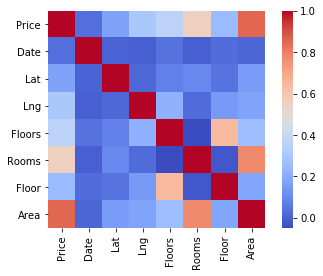

In [52]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [53]:
corr_mat > 0.5

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,True,False,False,False,False,True,False,True
Date,False,True,False,False,False,False,False,False
Lat,False,False,True,False,False,False,False,False
Lng,False,False,False,True,False,False,False,False
Floors,False,False,False,False,True,False,True,False
Rooms,True,False,False,False,False,True,False,True
Floor,False,False,False,False,True,False,True,False
Area,True,False,False,False,False,True,False,True


In [54]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Price   Area     0.852936
Rooms   Area     0.776492
Floors  Floor    0.641791
Price   Rooms    0.554399
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на небольшую корреляцию между ценой квартиры и географическими координатами (квартиры в нагорной части и особенно в нижегородском районе - дороже):

In [55]:
corr_mat.loc['Price', 'Lng'], corr_mat.loc['Price', 'Lat']

(0.3057627080568723, 0.17472831974270644)

Также обратите внимание, что коэффициент корреляции между `'Price'`, `'Date'` практически равен нулю

In [56]:
corr_mat.loc['Price', 'Date']

0.0332282805637181

Например, выберем все данные, соответствующие квартирам в деревянных строениях ценой больше 3 млн. и выше:

In [57]:
data.loc[(data['Building']=='Wooden') & (data['Price'] >= 3000), :]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
5396,5300.0,354,56.321805,44.004172,Resale,2.0,Wooden,5.0,2.0,103.0
7645,3500.0,221,56.205918,43.799766,Resale,2.0,Wooden,2.0,1.0,110.0
8548,3120.0,145,56.313518,44.008223,Resale,2.0,Wooden,3.0,1.0,70.0
12762,3100.0,310,56.323503,44.024052,Resale,2.0,Wooden,3.0,1.0,72.0
20220,3000.0,365,56.326333,44.021428,Resale,2.0,Wooden,2.0,1.0,53.0
23092,3200.0,181,56.266806,44.061916,Resale,3.0,Wooden,1.0,2.0,83.0
41743,5600.0,342,56.315061,43.988227,Resale,2.0,Wooden,4.0,2.0,103.0
47589,3200.0,316,56.312075,44.039224,Resale,1.0,Wooden,2.0,1.0,52.0
54033,3500.0,312,56.323343,44.019398,Resale,2.0,Wooden,2.0,1.0,47.0
58941,3500.0,369,56.306727,43.992027,Resale,1.0,Wooden,2.0,1.0,40.0


Или все данные, соответствующие продажам в деревянных новостройках:

In [58]:
data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area


Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [59]:
data['Type'].unique()

[Resale, New, NaN]
Categories (2, object): [Resale, New]

In [60]:
data['Building'].unique()

[Brick, Panel, Block, Monolithic, Wooden, NaN]
Categories (5, object): [Brick, Panel, Block, Monolithic, Wooden]

Обратите внимание, что в столбце `'Building'` имеются пропущенные значения (закодированные значением `np.nan`).

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [61]:
data['Type'].value_counts() 

Resale    63136
New        8112
Name: Type, dtype: int64

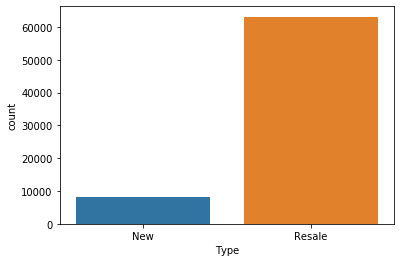

In [62]:
sns.countplot(x='Type', data=data)
pass

In [63]:
data['Building'].value_counts() 

Brick         52408
Panel         12170
Monolithic     4482
Block          1911
Wooden          277
Name: Building, dtype: int64

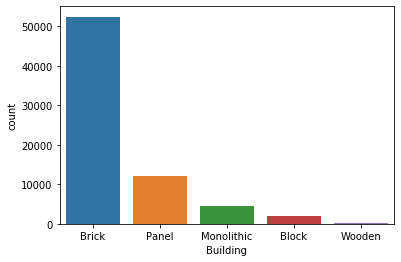

In [64]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
pass

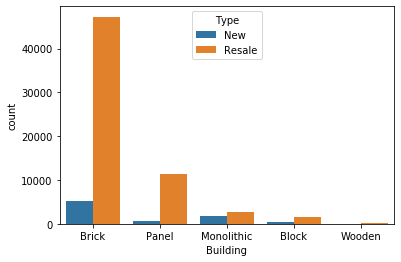

In [65]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
pass

##  4. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [66]:
data.isna().sum()  

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors      17
Building    17
Rooms       17
Floor       17
Area        17
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [67]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [68]:
data.isna().sum()  

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors       0
Building    17
Rooms        0
Floor        0
Area         0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:
    

In [69]:
data['Building'].fillna(data['Building'].mode().iloc[0], inplace=True)
data['Type'    ].fillna(data['Type'    ].mode().iloc[0], inplace=True)

In [70]:
data.isna().sum()  

Price       0
Date        0
Lat         0
Lng         0
Type        0
Floors      0
Building    0
Rooms       0
Floor       0
Area        0
dtype: int64

In [71]:
data.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000
mean,3310.907396,264.311120,56.295105,43.935371,9.406328,1.945990,5.188241,52.501778
std,1748.493102,87.897571,0.044836,0.081757,5.130792,0.910057,3.876387,21.400111
min,800.000000,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,18.000000
25%,2200.000000,190.000000,56.265022,43.868571,5.000000,1.000000,2.000000,37.000000
50%,2850.000000,295.000000,56.300147,43.931804,9.000000,2.000000,4.000000,46.000000
75%,3850.000000,344.000000,56.325320,44.005985,12.000000,3.000000,7.000000,63.000000
max,14900.000000,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,162.000000


In [72]:
data.describe(include=['category'])

,Type,Building
count,71265,71265
unique,2,5
top,Resale,Brick
freq,63153,52425


## 5. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарный признак `'Type'` заменим на числовой. 

`'Resale'` → 0, `'New'`→ 1 

Сделать это можно так:

In [73]:
data['Type'] = pd.factorize(data['Type'])[0]

Альтернативный способ:

In [74]:
# data['Type'] = data['Type'].cat.codes

К категориальному (небинарному) признаку `'Building'` применим метод *бинаризации* (*one-hot encoding*), 
который заключается в следующем.

Этот признак принимает 5 значений: `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`.

Вместо признака `'Building'` будем использовать 5 новых признаков (dummy-признаков, dummy - фиктивный), которые так и назовем `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`. При этом 
- если признак `'Building'` принимает значение `'Block'`, то признак `'Block'` равен 1, а все остальные 0;
- если признак `'Building'` принимает значение `'Brick'`, то признак `'Brick'` равен 1, а все остальные 0
- и т.д.

Такую бинаризацию можно выполнить с помощью функции `get_dummies`:

In [75]:
Building_dummies = pd.get_dummies(data['Building'])

In [76]:
Building_dummies.head()

,Block,Brick,Monolithic,Panel,Wooden
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


Добавим эти dummy-столбцы к таблице и удалим столбец `Building`:

In [77]:
data = pd.concat((data, Building_dummies), axis=1)
data = data.drop(['Building'], axis=1)

In [78]:
data.head()

,Price,Date,Lat,Lng,Type,Floors,Rooms,Floor,Area,Block,Brick,Monolithic,Panel,Wooden
0,3500.0,240,56.365696,43.820250,0,9.0,3.0,4.0,60.0,0,1,0,0,0
1,4000.0,240,56.323057,44.007862,0,3.0,3.0,3.0,57.0,0,1,0,0,0
2,2150.0,240,56.267552,43.892107,0,5.0,2.0,1.0,38.0,0,0,0,1,0
3,3100.0,240,56.359963,43.813756,0,5.0,4.0,2.0,59.0,0,0,0,1,0
4,3585.0,240,56.325374,43.937463,0,9.0,2.0,7.0,52.5,0,0,0,1,0


## 6. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [79]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [80]:
data_stand.describe()

,Price,Date,Lat,Lng,Type,Floors,Rooms,Floor,Area,Block,Brick,Monolithic,Panel,Wooden
count,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04
mean,-3.457784e-14,3.415814e-14,1.189763e-10,1.461346e-11,-7.783650e-15,1.042658e-15,-2.840891e-17,1.679265e-15,4.902486e-14,2.609938e-15,7.636375e-15,-4.229541e-15,-1.124466e-14,-1.911193e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.436041e+00,-2.369930e+00,-3.194676e+01,-2.603922e+01,-3.583966e-01,-1.638407e+00,-2.138317e+00,-1.080450e+00,-1.612224e+00,-1.659937e-01,-1.668114e+00,-2.590597e-01,-4.538025e-01,-6.246610e-02
25%,-6.353513e-01,-8.454286e-01,-6.709721e-01,-8.170459e-01,-3.583966e-01,-8.588008e-01,-1.039485e+00,-8.224775e-01,-7.243784e-01,-1.659937e-01,-1.668114e+00,-2.590597e-01,-4.538025e-01,-6.246610e-02
50%,-2.636026e-01,3.491437e-01,1.124355e-01,-4.362416e-02,-3.583966e-01,-7.919410e-02,5.934758e-02,-3.065331e-01,-3.038198e-01,-1.659937e-01,5.994710e-01,-2.590597e-01,-4.538025e-01,-6.246610e-02
75%,3.083184e-01,9.066107e-01,6.738943e-01,8.637058e-01,-3.583966e-01,5.055109e-01,1.158180e+00,4.673834e-01,4.905686e-01,-1.659937e-01,5.994710e-01,-2.590597e-01,-4.538025e-01,-6.246610e-02
max,6.628046e+00,1.225163e+00,1.857363e+01,6.728663e+00,2.790166e+00,3.039233e+00,4.454676e+00,5.110882e+00,5.116713e+00,6.024241e+00,5.994710e-01,3.860059e+00,2.203571e+00,1.600846e+01


## 7. Отбор признаков 

Для предсказания цены квартиры будем использовать все входные признаки, кроме `Date`.

In [81]:
data_stand.columns

Index(['Price', 'Date', 'Lat', 'Lng', 'Type', 'Floors', 'Rooms', 'Floor',
       'Area', 'Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'],
      dtype='object')

In [82]:
X = data_stand.drop(['Price', 'Date'], axis=1)
y = data['Price']

Можно конвертировать таблицы в массивы:

In [83]:
#X = np.array(data_stand.drop(['Price', 'Date'], axis=1))
#y = np.array(data['Price'])

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(53448, 17817)

## 8. Линейная регрессия 

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

In [85]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [87]:
lr_model.coef_

array([ 6.02006117e+01,  2.19592321e+02, -3.95453470e+01,  1.05169881e+02,
       -3.41135703e+02,  3.12635159e+01,  1.67635576e+03, -1.05285283e+15,
       -2.87416196e+15, -1.58223307e+15, -2.45257460e+15, -4.05540211e+14])

### Измеряем метрики качества

*Остаточная сумма квадратов*:
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где 
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где 
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(680391.8336842395, 646837.8801769295, 0.7785898643883027, 0.7850726934253254)

In [89]:
lr_model.score(X_train, y_train) # Коэффициент детерминации R^2

0.7785898643883027

In [90]:
lr_model.score(X_test, y_test)

0.7850726934253254

In [91]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(680391.8336842455, 646837.8801769273)

In [92]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(824.8586749766565, 804.2623205005488)

### Как цена зависит от площади квартиры?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Area`

In [93]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Area']], y_train)

y_train_predict = lr_model.predict(X_train[['Area']])
y_test_predict  = lr_model.predict(X_test[['Area']])

In [94]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [95]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(917.3718123137436, 899.3036150457865)

### Как цена зависит от количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Rooms`

In [96]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Rooms']], y_train)

y_train_predict = lr_model.predict(X_train[['Rooms']])
y_test_predict  = lr_model.predict(X_test[['Rooms']])

In [97]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [98]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(1458.981115973685, 1443.8483136229686)

Ошибка заметно возрасла

### Как цена зависит от площади и количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` от `Area` и `Rooms`

In [99]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Area', 'Rooms']], y_train)

y_train_predict = lr_model.predict(X_train[['Area', 'Rooms']])
y_test_predict  = lr_model.predict(X_test[['Area', 'Rooms']])

In [100]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [101]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(866.9660247204029, 848.6218659646153)

## 9. Случайный лес (Random Forest)

In [102]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [104]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(866.9660247204029, 848.6218659646153)

Полученные ошибки больше, чем ошибки линейной регрессии (при использовании всех признаков)

Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [105]:
importances = rf_model.feature_importances_
importances

array([6.22139845e-02, 7.34654792e-02, 2.99875976e-03, 5.59412566e-02,
       1.12561695e-02, 1.67005144e-02, 7.72393908e-01, 3.33813648e-04,
       1.30097657e-03, 1.85886292e-03, 1.41056163e-03, 1.25713024e-04])

In [106]:
np.sum(importances)

1.0

In [107]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Area          0.772394
Lng           0.073465
Lat           0.062214
Floors        0.055941
Floor         0.016701
Rooms         0.011256
Type          0.002999
Monolithic    0.001859
Panel         0.001411
Brick         0.001301
Block         0.000334
Wooden        0.000126
dtype: float64

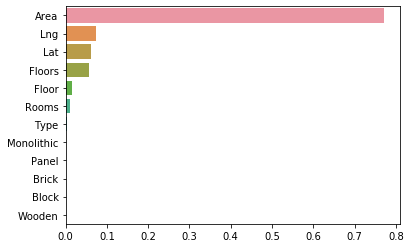

In [108]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass